# 신용카드 연체

## 문제점
최근 나날이 신용카드 사용량이 기하급수적으로 늘어나고 있다.
또한 연체자 비율도 늘어나고 있어.

신용카드 사용자에 대한 신용카드 연체 여부를 예측을 더 정확히 할 필요가 있다.

사용자의 성별, 자산, 직업, 가족 관계 등의 정보를 가지고 사용자의 신용 등급을 3개 등급으로 분류 했다.

사용자의 가족관계, 직업, 신용카드 사용 기간들이 신용 등급 평가에 큰 영향을 줄거라 믿는다.

## 가설
가설 1. 결혼을 하고 가족 구성원이 많을수록 신용 등급이 높을 것이다.

가설 2. 직장 연차가 늘어남에 따라 신용 등급이 높을 것이다.

가설 3. 신용카드 사용 기간이 길 수록 신용 등급이 높을 것이다.

# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/train.csv', index_col = 0)
test = pd.read_csv('data/test.csv', index_col = 0)
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
train.info()
test.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


## 데이터 전처리
1. 성별, 차 소유 여부, 부동산 소유 여부를 이진분류로 0(미소유)과 1(소유)로 변환
2. DAYS_BIRTH를 사용하여 사용자의 나이 계산하여 AGE 칼럼 생성
3. DAYS_EMPLOYED를 사용하여 사용자의 직장 연차 계산하여 WORK_YEAR 칼럼 생성
4. begin_month 사용하여 사용자의 신용카드 이용 개월 수 계산하여 use_month 칼럼 생성
5. occyp_type 결측치 중 work_year이 0 인 사용자들은 Unoccupied로 그 외 결측치는 Laborers로 채워줬다.

## 이상치 제거
데이터 분석 중 
1. 같은 사용자가 복수의 신용카드를 가지고 있을 경우 한 사용자에 대한 데이터가 각 신용카드 별로 기입 되있음을 확인.
2. 만약 같은 사용자를 ID화 시켜서 ID칼럼을 만들어 분석 할 경우 더 정확한 예측이 가능할 것이다.
3. 그러나 그렇게되면 이전의 다른 데이터를 가지고 오는 것이라 판단되어 문제의 논점이 흐려지는 것 같다.

In [5]:
def pre_processing(df):
    df['gender'] = df['gender'].map(lambda x: 1 if x == 'M' else 0)
    df['car'] = df['car'].map(lambda x: 1 if x == 'Y' else 0)
    df['reality'] = df['reality'].map(lambda x: 1 if x == 'Y' else 0)

    df['age'] = (df['DAYS_BIRTH'].abs())/365
    df['age'] = df['age'].astype(int)

    df['work_year'] = (-df['DAYS_EMPLOYED'])/365
    df.loc[df['work_year'] < 0, 'work_year'] = 0
    df['work_year'] = df['work_year'].apply(np.ceil).astype(int)

    df['use_month'] = df['begin_month'].abs()
    df['use_month'] = df['use_month'].astype(int)

    df['family_size'] = df['family_size'].astype(int)
    # df['credit'] = df['credit'].astype(int)

    df.loc[df['work_year'] == 0, 'occyp_type'] = 'Unoccupied'
    df['occyp_type'] = df['occyp_type'].fillna('Laborers')

    return df

In [6]:
def outlier(df):
    df = df[(df['family_size'] <= 7)]
    return df

In [7]:
train_copy = train.copy()
test_copy = test.copy()
train_feature = pre_processing(train_copy)
train_feature = outlier(train_feature)
test_proccessed = pre_processing(test_copy)

feature = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'family_size', 'age', 'work_year', 'use_month', 'income_total']
target = ['credit']

X_train = train_feature[feature]
y_train = train_feature[target]
train = pd.concat([X_train, y_train], axis = 1)

X_test = test_proccessed[feature]

In [8]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26451 entries, 0 to 26456
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        26451 non-null  int64  
 1   car           26451 non-null  int64  
 2   reality       26451 non-null  int64  
 3   income_type   26451 non-null  object 
 4   edu_type      26451 non-null  object 
 5   family_type   26451 non-null  object 
 6   house_type    26451 non-null  object 
 7   occyp_type    26451 non-null  object 
 8   family_size   26451 non-null  int64  
 9   age           26451 non-null  int64  
 10  work_year     26451 non-null  int64  
 11  use_month     26451 non-null  int64  
 12  income_total  26451 non-null  float64
 13  credit        26451 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 3.0+ MB


,gender,car,reality,family_size,age,work_year,use_month,income_total,credit
count,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,26451.000000,2.645100e+04,26451.000000
mean,0.331065,0.379721,0.673925,2.194208,43.213905,6.440929,26.122793,1.873073e+05,1.519451
std,0.470605,0.485327,0.468784,0.898041,11.514370,6.582036,16.558989,1.018878e+05,0.702325
min,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000,2.700000e+04,0.000000
25%,0.000000,0.000000,0.000000,2.000000,34.000000,2.000000,12.000000,1.215000e+05,1.000000
50%,0.000000,0.000000,1.000000,2.000000,42.000000,5.000000,24.000000,1.575000e+05,2.000000
75%,1.000000,1.000000,1.000000,3.000000,53.000000,9.000000,39.000000,2.250000e+05,2.000000
max,1.000000,1.000000,1.000000,7.000000,68.000000,44.000000,60.000000,1.575000e+06,2.000000


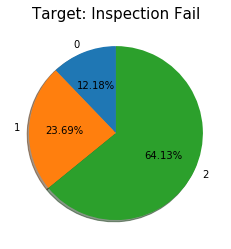

(3222, 6267, 16962)

In [9]:
def analysis_on_target(df):
    """
    n_zero_label, n_one_label에
    각각 label이 0인 데이터의 수, label이 1인 데이터의 수를 담아 반환하세요.
    """
    n_zero_label, n_one_label, n_two_label = -1, -1, -1

    n_two_label = sum(df['credit'] == 2)
    n_one_label = sum(df['credit'] == 1)
    n_zero_label = sum(df['credit'] == 0)

    plt.pie(
        (n_zero_label, n_one_label, n_two_label),
        labels=(0, 1, 2),
        autopct="%.2f%%",
        shadow=True,
        startangle=90,
    )
    plt.title("Target: Inspection Fail", size=15)
    plt.show()

    return n_zero_label, n_one_label, n_two_label
analysis_on_target(y_train)

In [10]:
train.head()

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type,family_size,age,work_year,use_month,income_total,credit
index,,,,,,,,,,,,,,
0,0,0,0,Commercial associate,Higher education,Married,Municipal apartment,Laborers,2,38,13,6,202500.0,1.0
1,0,0,1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Laborers,3,31,5,5,247500.0,1.0
2,1,1,1,Working,Higher education,Married,House / apartment,Managers,2,52,13,22,450000.0,2.0
3,0,0,1,Commercial associate,Secondary / secondary special,Married,House / apartment,Sales staff,2,41,6,37,202500.0,0.0
4,0,1,1,State servant,Higher education,Married,House / apartment,Managers,2,41,6,26,157500.0,2.0


In [11]:
income_type = train['income_type'].unique()
for type in income_type:
    print(train[train['income_type'] == type].groupby('credit').count()['gender'])

credit
0.0     782
1.0    1344
2.0    4076
Name: gender, dtype: int64
credit
0.0    1639
1.0    3347
2.0    8653
Name: gender, dtype: int64
credit
0.0     265
1.0     489
2.0    1400
Name: gender, dtype: int64
credit
0.0     536
1.0    1084
2.0    2829
Name: gender, dtype: int64
credit
1.0    3
2.0    4
Name: gender, dtype: int64


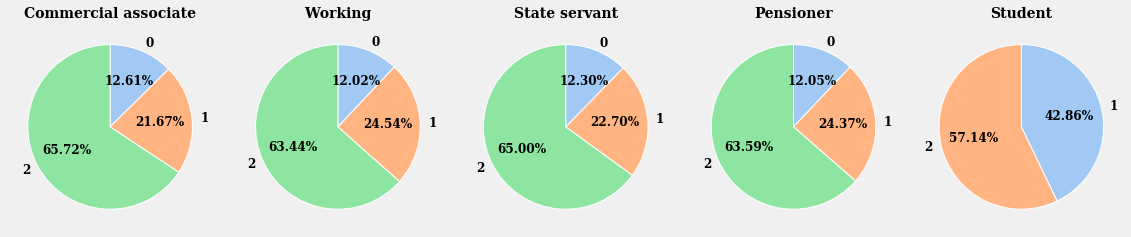

In [12]:
fig, ax = plt.subplots(figsize=(16,8),facecolor='#F0F0F0')
sns.set_theme(style='whitegrid', palette="pastel")
explode = [0.1, 0, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
font = {'family': 'serif',
         'color': 'black',
         'weight': 'bold',
         'size': 14}
font_pie = {'family': 'serif',
            'weight' : 'bold',
            'color': 'black',
            'size': 12}


for i, type in enumerate(income_type):
        df = train[train['income_type'] == type].groupby('credit').count()['gender']
        plt.subplot(1,5,i + 1)
        plt.pie(df, labels = df.index.astype(int), 
                # explode= explode, wedgeprops=wedgeprops, 
                autopct='%.2f%%', counterclock=False, startangle = 90,
                textprops=font_pie)
        plt.title(type, fontdict = font)


fig.tight_layout()
plt.savefig('Graph/income type pie graph', dpi = 200)
plt.show()

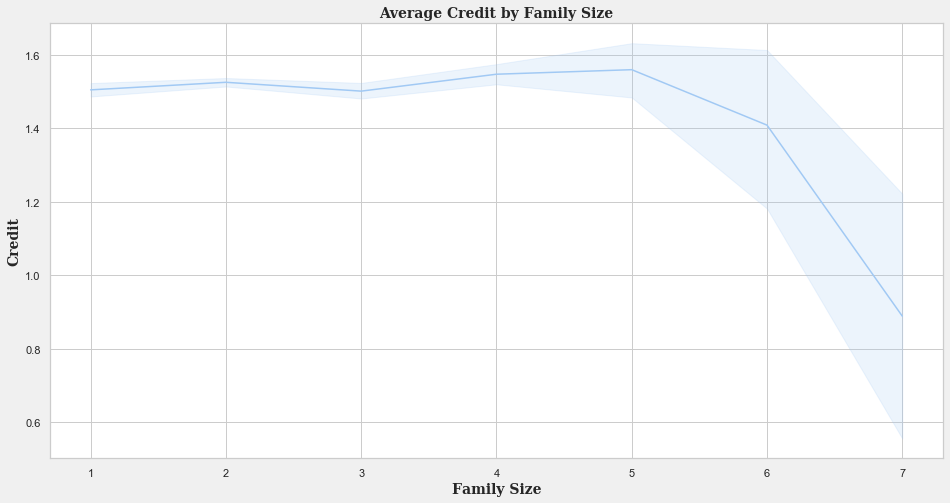

In [13]:
fig, ax = plt.subplots(figsize = (16, 8), facecolor='#F0F0F0')
sns.set_theme(style='whitegrid', palette="pastel")
font = {'family': 'serif',
         'weight': 'bold',
         'size': 14}

df = train.groupby('family_size').mean()['credit']

sns.lineplot(x = train['family_size'], y = train['credit'], markers=False)
plt.title('Average Credit by Family Size', fontdict= font)
plt.ylabel('Credit', fontdict=font)
plt.xlabel('Family Size', fontdict=font)
plt.savefig('Graph/Average Credit by Family Size', dpi = 200)

plt.show()

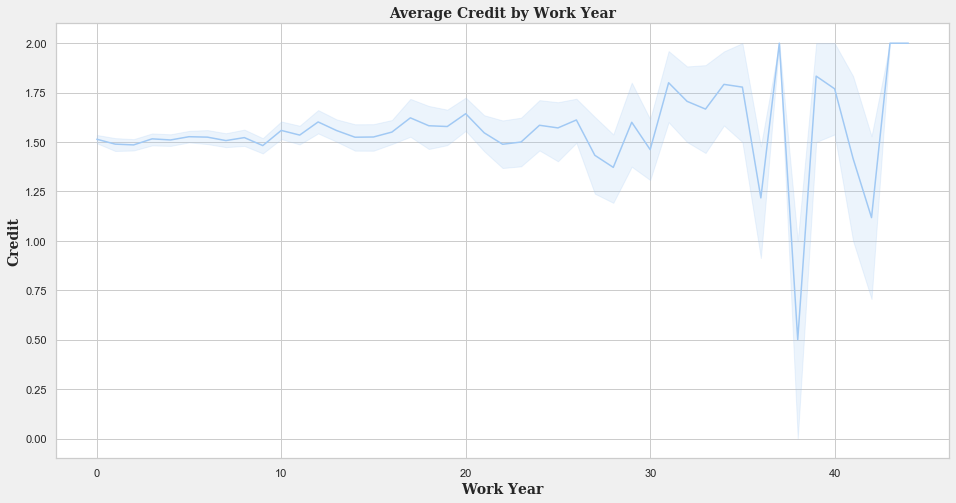

In [14]:
fig, ax = plt.subplots(figsize = (16, 8), facecolor='#F0F0F0')
sns.set_theme(style='whitegrid', palette="pastel")
font = {'family': 'serif',
         'weight': 'bold',
         'size': 14}

df = train.groupby('work_year').mean()['credit']

sns.lineplot(x = train['work_year'], y = train['credit'], markers=False)
plt.title('Average Credit by Work Year', fontdict= font)
plt.ylabel('Credit', fontdict=font)
plt.xlabel('Work Year', fontdict=font)
plt.savefig('Graph/Average Credit by Work Year', dpi = 200)

plt.show()

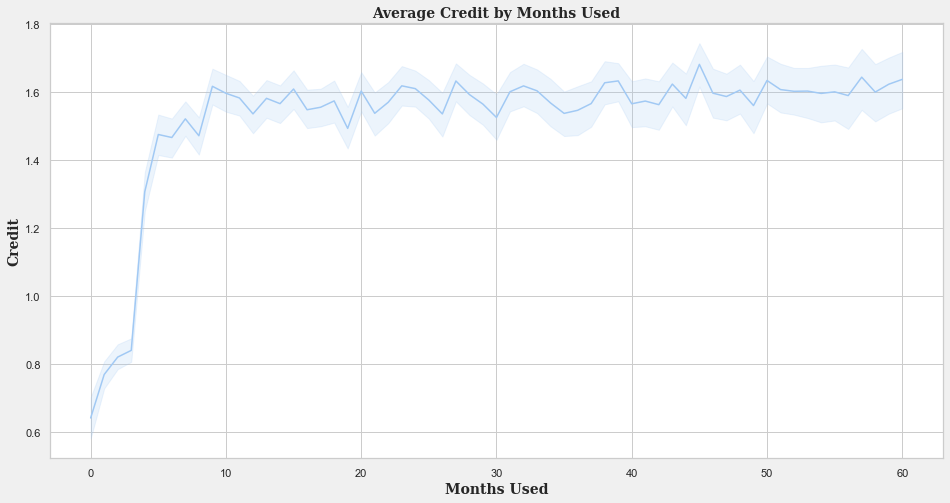

In [15]:
fig, ax = plt.subplots(figsize = (16, 8), facecolor='#F0F0F0')
sns.set_theme(style='whitegrid', palette="pastel")
font = {'family': 'serif',
         'weight': 'bold',
         'size': 14}

sns.lineplot(x = train['use_month'], y = train['credit'], markers=False)
plt.title('Average Credit by Months Used', fontdict= font)
plt.ylabel('Credit', fontdict=font)
plt.xlabel('Months Used', fontdict=font)
plt.savefig('Graph/Average Credit by Months Used', dpi = 200)

plt.show()

In [16]:
train.to_csv('data/train_clean.csv')
X_test.to_csv('data/test_clean.csv')